## Background and Context:
Twitter posses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other side, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.
That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.

Listening to how customers feel about the product/services on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand, and their competitors, and discover new trends in the industry.


## Data Description:
A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

## Dataset:
The dataset has the following columns:
•	tweet_id                                                           
•	airline_sentiment                                               
•	airline_sentiment_confidence                               
•	negativereason                                                   
•	negativereason_confidence                                    
•airline                                                                   
•	airline_sentiment_gold                                              
•	name     
•	negativereason_gold  
•	retweet_count    
•	text   
•	tweet_coord   
•	tweet_created   
•	tweet_location     
•	user_timezone 


In [1]:
!pip install contractions

     |████████████████████████████████| 286kB 2.9MB/s 
     |████████████████████████████████| 327kB 22.2MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85403 sha256=2baf9221df2f387f643894a7340b1348324335ecb3423776edc1c89b44e07d30
  Stored in directory: /root/.cache/pip/wheels/3a/03/34/77e3ece0bba8b86bfac88a79f923b36d805cad63caeba38842
Successfully built pyahocorasick


# 1. Import the libraries, load dataset, print shape of data, visualize the images in dataset.

## Import Libraries

In [2]:

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt                         # Import plt for visualization

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


### Load dataset

In [3]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:

#Defining the path of the dataset
project_path = '/content/drive/My Drive/AIML/Project8/'
dataset_file = project_path + 'Tweets.csv'

In [5]:
#Read in CSV data set with airline sentiment data
data = pd.read_csv(dataset_file)

### Print shape of data

In [6]:
data.shape

(14640, 15)

**Insight:**
The data contains 14,640 rows and has 15 columns

### Data Description

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

**Insights:**
There are 15 columns with 2 float64, 2 int64 and rest are object. The two varibles we are interested in are airline_sentiment and text. There are no null values for these two variables

In [8]:
data.describe(include='all')

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
count,1.464000e+04,14640,14640.000000,9178,10522.000000,14640,40,14640,32,14640.000000,14640,1019,14640,9907,9820
unique,NaN,3,NaN,10,NaN,6,3,7701,13,NaN,14427,832,14247,3081,85
top,NaN,negative,NaN,Customer Service Issue,NaN,United,negative,JetBlueNews,Customer Service Issue,NaN,@united thanks,"[0.0, 0.0]",2015-02-24 09:54:34 -0800,"Boston, MA",Eastern Time (US & Canada)
freq,NaN,9178,NaN,2910,NaN,3822,32,63,12,NaN,6,164,5,157,3744
mean,5.692184e+17,NaN,0.900169,NaN,0.638298,NaN,NaN,NaN,NaN,0.082650,NaN,NaN,NaN,NaN,NaN
std,7.791112e+14,NaN,0.162830,NaN,0.330440,NaN,NaN,NaN,NaN,0.745778,NaN,NaN,NaN,NaN,NaN
min,5.675883e+17,NaN,0.335000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,5.685592e+17,NaN,0.692300,NaN,0.360600,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,5.694779e+17,NaN,1.000000,NaN,0.670600,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,5.698905e+17,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


**Insights:** For this paticular project, we are only concerned with airline_sentiment and text. Only facts about these two variables will be discussed.
Airline_sentiment is completely populated and the most common sentiment is negative and there are three different possible values

Text has unique value for each observation

In [9]:
# Print out of 5 rows
pd.set_option('display.max_colwidth', None) # expanding view so text can be fully seen
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


#2. Understand of data columns

  ## a. Drop all other columns except “text” and “airline_sentiment”.

In [10]:
data_sub=data[['text','airline_sentiment']].copy()# create a subset of the data with just airline_sentiment and text

## b. Check the shape of the data.

In [11]:
data_sub.shape

(14640, 2)

**Insights:**
After dropping all the variables besides text and airline_sentiment, the data has 14640 observations and 2 columns as expected

## c. Print the first 5 rows of data.

In [12]:
data_sub.head(5)

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [13]:
data_sub['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

**Insights:** From the printout of 5 records, we can see there are several @ signs and contraction signs. Also, we can see airline_sentiment can take 3 values: Negative, Neutral, Positive. Roughly 2/3s of the sentiment is negative

# 3. Text pre-processing: Data preparation

## a. Html tag removal

In [14]:
# use the beautiful soup html parser to remove html code
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

data_sub['text'] = data_sub['text'].apply(lambda x: strip_html(x))
data_sub.head()


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


## b. Remove the numbers

In [15]:
# Use regular expression to remove numbers
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data_sub['text'] = data_sub['text'].apply(lambda x: remove_numbers(x))
data_sub.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


### c. Replacement of contractions

In [16]:
# Use contracts library to expand contracts before other processing
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data_sub['text'] = data_sub['text'].apply(lambda x: replace_contractions(x))
data_sub.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


### d. Tokenization.

In [17]:
# tokenize the text so more pre-processing can be execute on  text especially lemmazation and stop-word
data_sub['text'] = data_sub.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

In [18]:
data_sub.head()

,text,airline_sentiment
0,"[@, VirginAmerica, What, @, dhepburn, said, .]",neutral
1,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]",positive
2,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]",neutral
3,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]",negative
4,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]",negative


### e. Remove non-ASCII characters

In [19]:
## Create a function to remove all non-ASCII characters then recode it into utf-8 
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [20]:
data_sub['text'] = data_sub.apply(lambda row: remove_non_ascii(row['text']), axis=1)
data_sub.head()

,text,airline_sentiment
0,"[@, VirginAmerica, What, @, dhepburn, said, .]",neutral
1,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]",positive
2,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]",neutral
3,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]",negative
4,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]",negative


Removal of Special Characters and Punctuations.

In [21]:
# Use regular expression to remove special Characters and Punctuations
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

In [22]:
data_sub['text'] = data_sub.apply(lambda row: remove_punctuation(row['text']), axis=1)
data_sub.head()

,text,airline_sentiment
0,"[VirginAmerica, What, dhepburn, said]",neutral
1,"[VirginAmerica, plus, you, have, added, commercials, to, the, experience, tacky]",positive
2,"[VirginAmerica, I, did, not, today, Must, mean, I, need, to, take, another, trip]",neutral
3,"[VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, they, have, little, recourse]",negative
4,"[VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]",negative


## f. Conversion to lowercase




In [23]:
# Convert to lowercase to more efficiently to reduce the amount of features needed
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

In [24]:
data_sub['text'] = data_sub.apply(lambda row: to_lowercase(row['text']), axis=1)
data_sub.head()

,text,airline_sentiment
0,"[virginamerica, what, dhepburn, said]",neutral
1,"[virginamerica, plus, you, have, added, commercials, to, the, experience, tacky]",positive
2,"[virginamerica, i, did, not, today, must, mean, i, need, to, take, another, trip]",neutral
3,"[virginamerica, it, is, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, they, have, little, recourse]",negative
4,"[virginamerica, and, it, is, a, really, big, bad, thing, about, it]",negative


Removal of stopwords

In [25]:
# Remove stopwords so features are reduced because common words will be removed

stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list is to keep the meaning of combinations of not

stopwords = list(set(stopwords) - set(customlist))    

In [26]:
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

In [27]:
data_sub['text'] = data_sub.apply(lambda row: remove_stopwords(row['text']), axis=1)
data_sub.head()

,text,airline_sentiment
0,"[virginamerica, dhepburn, said]",neutral
1,"[virginamerica, plus, added, commercials, experience, tacky]",positive
2,"[virginamerica, not, today, must, mean, need, take, another, trip]",neutral
3,"[virginamerica, really, aggressive, blast, obnoxious, entertainment, guests, faces, little, recourse]",negative
4,"[virginamerica, really, big, bad, thing]",negative


 ### g. Lemmatize

In [28]:
#Lemmatize the words so the stems are left. This helps reduce the number of features
lemmatizer = WordNetLemmatizer()
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

In [29]:
data_sub['text'] = data_sub.apply(lambda row: lemmatize_list(row['text']), axis=1)
data_sub.head()

,text,airline_sentiment
0,"[virginamerica, dhepburn, say]",neutral
1,"[virginamerica, plus, add, commercials, experience, tacky]",positive
2,"[virginamerica, not, today, must, mean, need, take, another, trip]",neutral
3,"[virginamerica, really, aggressive, blast, obnoxious, entertainment, guests, face, little, recourse]",negative
4,"[virginamerica, really, big, bad, thing]",negative


### h. Join the words in the list to convert back to text string in the data frame and print out 5 first rows of after pre-processing data

In [30]:
data_sub['text'] = data_sub['text'].apply(lambda x: ' '.join(map(str, x)))
data_sub.head()

,text,airline_sentiment
0,virginamerica dhepburn say,neutral
1,virginamerica plus add commercials experience tacky,positive
2,virginamerica not today must mean need take another trip,neutral
3,virginamerica really aggressive blast obnoxious entertainment guests face little recourse,negative
4,virginamerica really big bad thing,negative


**Insights:**
The data looks as expected. Lower case, numbers removed, and stop words removed 

In [31]:
#Checking that the text is a string
type(data_sub['text'][0])

str

## Make a word cloud

In [32]:
data_sub['text_cloud'] = data_sub.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

import wordcloud
def show_wordcloud(data, title):
    text = ' '.join(data['text_cloud'].astype(str).tolist())                 # Converting Summary column into list
    stopwords = set(wordcloud.STOPWORDS)                                  # instantiate the stopwords from wordcloud
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',          # Setting the different parameter of stopwords
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)                             
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

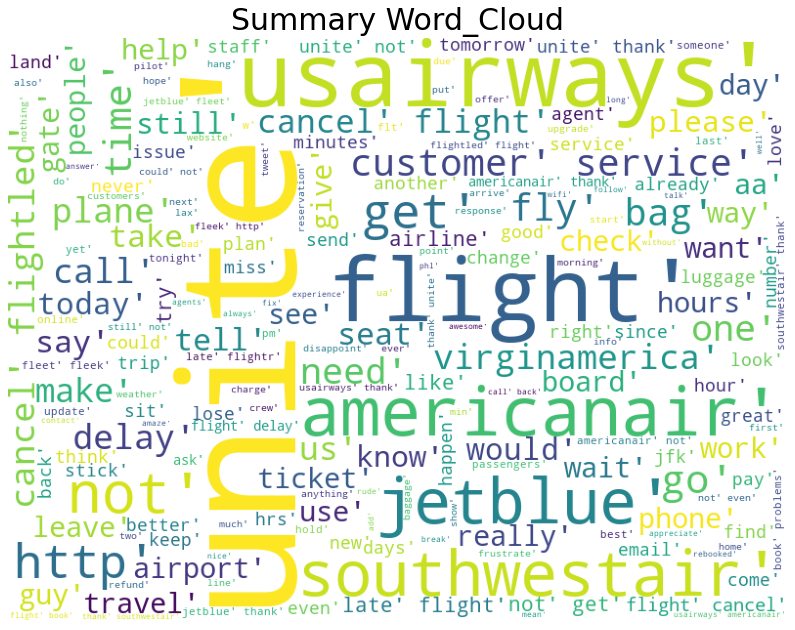

In [33]:
show_wordcloud(data_sub,'Summary Word_Cloud')

**Insights:**
The names of the airlines are a common word. For an improvement, they could be removed for list of words

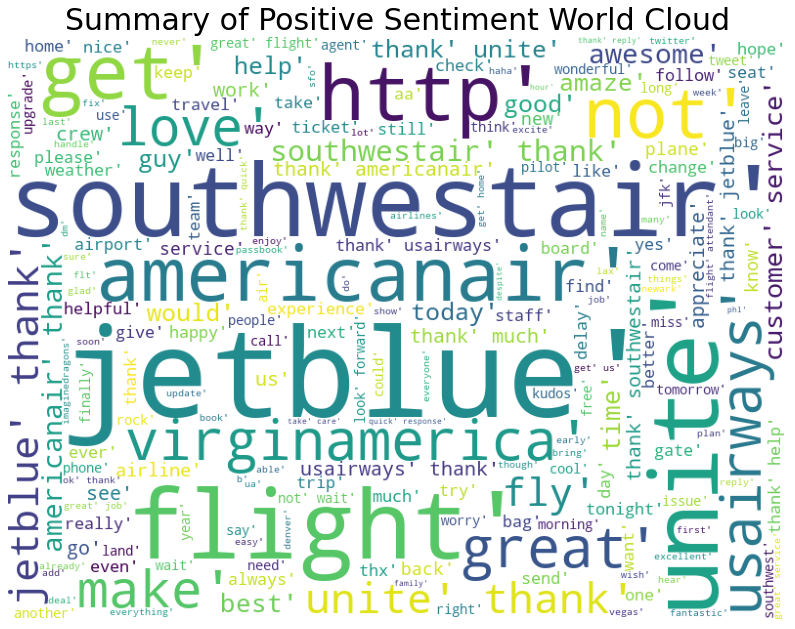

In [34]:
show_wordcloud(data_sub[data_sub.airline_sentiment == 'positive'], title = "Summary of Positive Sentiment World Cloud")

**Insights:**
http is included in common words. This could be removed. Happy, thank, updgrade are words that make sense to be associated with positive sentiment

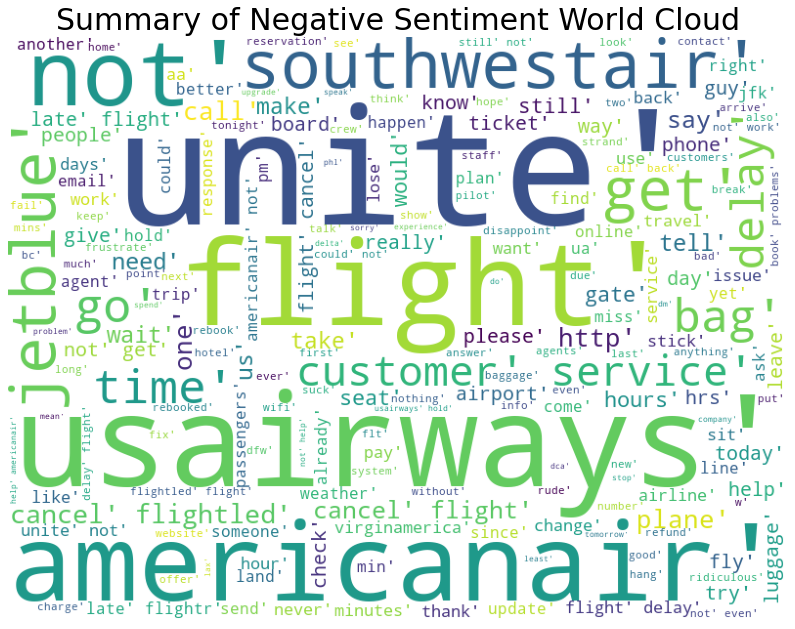

In [35]:
show_wordcloud(data_sub[data_sub.airline_sentiment == 'negative'], title = "Summary of Negative Sentiment World Cloud")

**Insights:**
Words like refund, cancel, phone are associated with negative sentiment

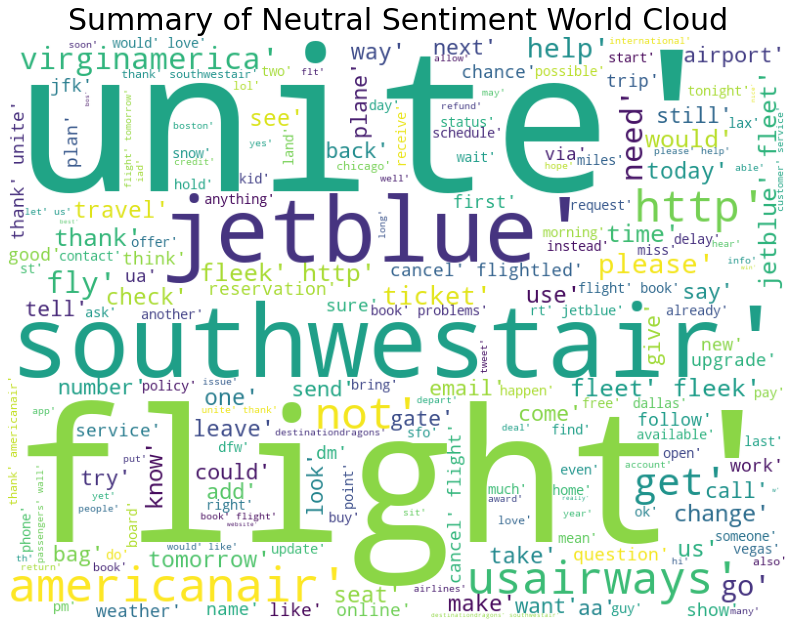

In [36]:
show_wordcloud(data_sub[data_sub.airline_sentiment == 'neutral'], title = "Summary of Neutral Sentiment World Cloud")

# 4. Vectorization and 5. Fit and evaluate the model using CountVectorizer and TfidfVectorizer

### Use CountVectorizer and Random Forest model

#### Create features using CountVectorizer from sklearn

In [37]:
# Vectorization using CountVectorizer.
from sklearn.feature_extraction.text import CountVectorizer

bow_vec = CountVectorizer(max_features=2000)                # Keep only 2000 features
data_features = bow_vec.fit_transform(data_sub['text'])

data_features = data_features.toarray()                        # Convert the data to array.

In [38]:
data_features.shape

(14640, 2000)

**Insights:** There are 14,640 observations with 2,000 features as expected

#### Create labels and convert labels to numeric

In [39]:
labels = data_sub[['airline_sentiment']]

In [40]:
labels.value_counts()

airline_sentiment
negative             9178
neutral              3099
positive             2363
dtype: int64

The airline_sentiment values negative, neutral and positive will need to be coded into numeric. Using the following mapping negative = -1, neutral = 0, and positive = 1

In [41]:
#Creating mapping for airline_sentiment
replaceStruct = {
    "airline_sentiment":     {"negative": -1, "neutral": 0,"positive": 1  } 
                    }

In [42]:
# Replacing the alpha with the numeric mapping
labels=labels.replace(replaceStruct)

In [43]:
# Converting dataframe to a series for the modeling
labels = labels['airline_sentiment']

In [44]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [45]:
# Using Random Forest model with cross validation for classification.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7123633879781421


              precision    recall  f1-score   support

          -1       0.81      0.89      0.85      2814
           0       0.55      0.50      0.52       884
           1       0.72      0.55      0.63       694

    accuracy                           0.76      4392
   macro avg       0.70      0.65      0.67      4392
weighted avg       0.75      0.76      0.75      4392



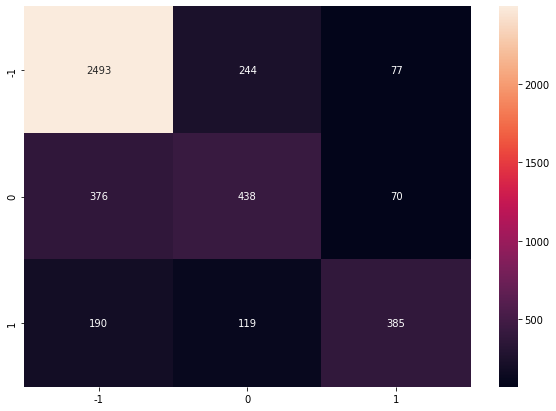

In [46]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.
result =  forest.predict(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

conf_mat = confusion_matrix(y_test, result)


print(classification_report(y_test, result, labels=[-1, 0, 1]))

df_cm = pd.DataFrame(conf_mat, index = [i for i in [-1,0,1]],
                  columns = [i for i in [-1,0,1]])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g');

**Insights:**
The model didn't perform great. If someone would have guess all negative the accuracy would have been 64%. Where as our model had 76% accuracy. The precison and recall for the neutral sentiment was particularly low at 0.56 and 0.46 respectively. The model could be improved by balancing the data set more. Right now, it is over weighted with negative sentiment 

### **Word Cloud of top 40 important features from the CountVectorizer + Random Forest based model**

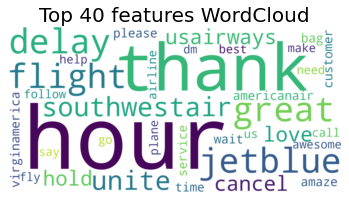

In [47]:


all_features = bow_vec.get_feature_names()              
top_features=''                                           
feat=forest.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
    

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

**Insights:** Some of  top features are delay, flight, hour, thank, great and late

### Use TFIDFvectorizer and Random Forest model

### **Term Frequency(TF) - Inverse Document Frequency(IDF)**

In [48]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2000) # limit to 2000 features
data_features = vectorizer.fit_transform(data_sub['text'])

data_features = data_features.toarray()

data_features.shape

(14640, 2000)

**Insights:**
As expected, there are 14,640 observations and 2,000 features

In [49]:
# Using Random Forest to build model with cross validations for the classification of reviews.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=5)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.6877049180327868


              precision    recall  f1-score   support

          -1       0.82      0.89      0.85      2814
           0       0.55      0.50      0.53       884
           1       0.71      0.57      0.64       694

    accuracy                           0.76      4392
   macro avg       0.70      0.65      0.67      4392
weighted avg       0.75      0.76      0.75      4392



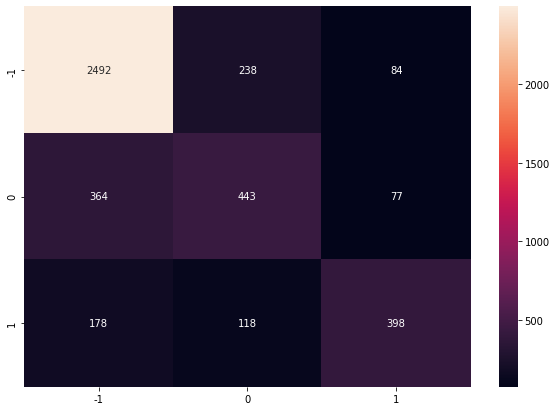

In [50]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.
result =  forest.predict(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

conf_mat = confusion_matrix(y_test, result)


print(classification_report(y_test, result, labels=[-1, 0, 1]))

df_cm = pd.DataFrame(conf_mat, index = [i for i in [-1,0,1]],
                  columns = [i for i in [-1,0,1]])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g');

**Insights:**
The model performed very similar to the model builted on the CountVectorizer features. The comments above can apply here

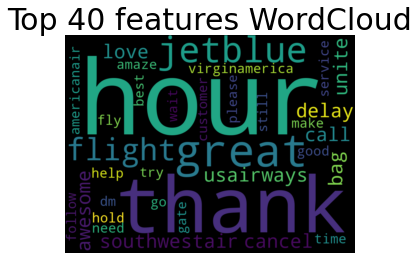

In [51]:

all_features = vectorizer.get_feature_names()                                #Instantiate the feature from the vectorizer
Top_features=''                                                              #Addition of top 40 feature into top_feature after training the model
feat=forest.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    Top_features+=all_features[i]
    Top_features+=' '
    
  
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="Black",width=1000, 
                          height=750).generate(Top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(30, 30), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=30)
plt.axis("off")
plt.show()

**Insights:** The top 40 features using the TF-IDF vectors are very similar to the ones for CountVectorizer

### **Summary**:

- We used a dataset which has **tweets in text format and their sentiment was given as positive, neutral and negative.**
- The goal was to **build a model for text-classification** for sentiment analysis.
- Only keep sentiment and text for modeling.
- Pre-processed the data using Html tag removal, Tokenization, Remove the numbers, special characters, contractions, Punctuations and stop words. Also, lemmazied the data
- Since the models need numeric inputs to feed into the random forest models, we vectorized the data using both Countvectorizer and TFIDFvectorizer.
- Converted sentiment into the numeric labels. There were three classes of -1(negative),0(neutral),1(postive)
- Train 2 random forest models using the vetorized data and the new labels
- Both of the models performed similar with 76% accuracy scores and both models picked similar features. Also, both models had trouble with neutral classifications. The model had tendency to code neutral as negative
- We saw that using the above techniques, our model performed well in perspective of how text classification models perform.
- The models could be improved by using N-grams, rebalancing the data since data was weighted to heavily to negative sentiment. Also, could use tuning hyper parameters and regularization 